**Business Goal:**

To model the demand for shared bikes with the available independent variables.


To model the demand for shared bikes with the available independent variables.

## Importing Libraries

In [1]:
#import filterwarnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and Reading the dataset

In [3]:
bike = pd.read_csv("day.csv",index_col="instant")

In [4]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 15)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


Observation :  We do not find any missing value in the dataset

In [7]:
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


## Data Cleaning 

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

### Dealing with Categorical columns

In [8]:
bike["dteday"]=pd.to_datetime(bike["dteday"])

In [9]:
#Defining function to convert "season" column to categorical
def seasons(value):
    return value.map({
    1:"spring",
    2:"summer",
    3:"fall",
    4:"winter"})

In [10]:
#applying the seasons function
bike[["season"]]=bike[["season"]].apply(seasons)

In [11]:
#yr : year (0: 2018, 1:2019)
#Defining a function to fill in the yr column with valid year
def yr(value):
    return value.map({0:"2018",1:"2019"})

In [12]:
bike[["yr"]]=bike[["yr"]].apply(yr)

In [13]:
#mnth : month ( 1 to 12)
from datetime import date
bike["mnth"]=bike["dteday"].dt.strftime("%b")


In [14]:
# Handling Holiday column - to convert "holiday" column to categorical
bike["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
#Defining function to convert "holiday" column to categorical
def holiday(value):
    return value.map({0:"Not a public holiday",1:"Public holiday"})

In [16]:
bike[["holiday"]]=bike[["holiday"]].apply(holiday)

In [17]:
# Handling weekday column - to convert "weekday" column to categorical
bike["weekday"]=bike["dteday"].dt.strftime("%a")

In [18]:
# Handling workingday column - to convert "workingday" column to categorical
bike["workingday"]=bike["workingday"].apply(lambda x: "Weekend" if x==0 else "Weekday")

In [19]:
# Handling weathersit
def weather(value):
    return value.map({
        1: "Clear/Partly cloudy",
        2: "Mist+Cloudy",
        3: "Light Snow/Rain+Thunderstorm",
        4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist/ Snow + Fog"})

In [20]:
bike[["weathersit"]]=bike[["weathersit"]].apply(weather)

In [21]:
#creating a DF with categorical columns - for manipulation purposes
bike_cat = bike.select_dtypes(exclude=["float64","int64",'datetime64[ns]'])

### Dealing with Numerical columns

In [22]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [23]:
#creating a DF with Numerical columns-for manipulation purposes
bike_numerical = bike.select_dtypes(include=["float64","int64",'datetime64[ns]'])

## Visualising the Categorical columns

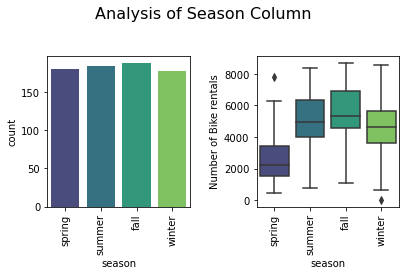

In [24]:
#Analysis of Season Column 
fig,ax = plt.subplots(figsize=(6,4),nrows=1,ncols=2)
fig.suptitle("Analysis of Season Column",fontsize=16)
sns.boxplot(data=bike,x=bike["season"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='season', ylabel='Number of Bike rentals')
sns.countplot(data=bike,x=bike["season"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=5,
        hspace=8,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 2)
plt.show()

Observation - 
1. It can be observed that Bike rentals are more during Summer and Fall as the median value of both seasons are higher compared to spring and Winter.


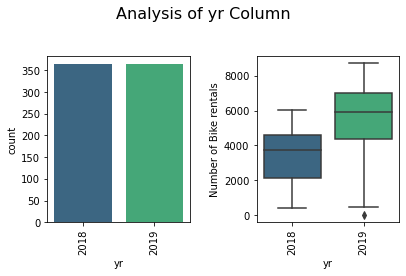

In [25]:
#Analysis of yr  Column in a box plot
fig,ax = plt.subplots(figsize=(6,4),nrows=1,ncols=2)
fig.suptitle("Analysis of yr Column",fontsize=16)
sns.boxplot(data=bike,x=bike["yr"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='yr', ylabel='Number of Bike rentals')
sns.countplot(data=bike,x=bike["yr"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=5,
        hspace=8,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 2)
plt.show()

Obervation:

   1. It is observed that bike rentals are higher in 2019

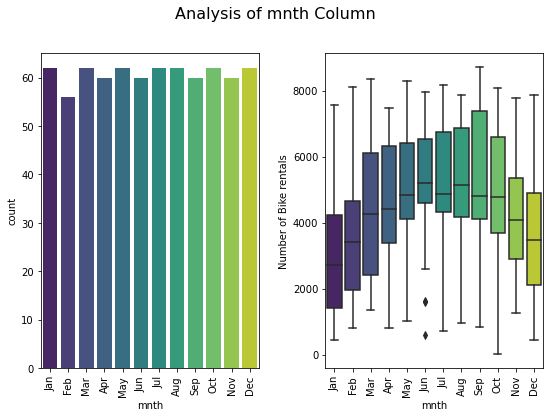

In [26]:
#Analysis of mnth  Column in a box plot
fig,ax = plt.subplots(figsize=(8,6),nrows=1,ncols=2)
fig.suptitle("Analysis of mnth Column",fontsize=16)
sns.boxplot(data=bike,x=bike["mnth"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='mnth', ylabel='Number of Bike rentals')
sns.countplot(data=bike,x=bike["mnth"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=5,
        hspace=8,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 2)
plt.show()

Observation :

   1. It is observed that the number of bike rentals are higher from the month of Mar to Oct.
   2. Dec to Feb are the lowest in number of Bike rentals 

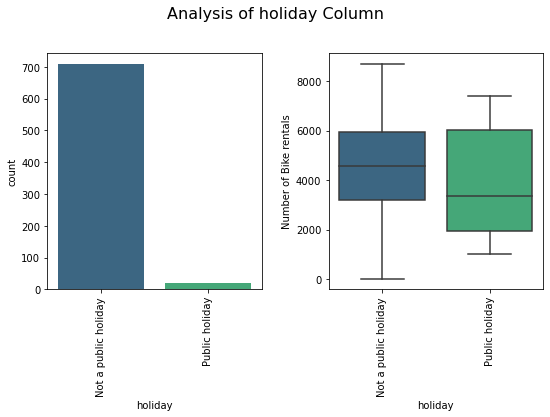

In [27]:
#Analysis of holiday  Column in a box plot
fig,ax = plt.subplots(figsize=(8,6),nrows=1,ncols=2)
fig.suptitle("Analysis of holiday Column",fontsize=16)
sns.boxplot(data=bike,x=bike["holiday"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='holiday', ylabel='Number of Bike rentals')
sns.countplot(data=bike,x=bike["holiday"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=5,
        hspace=8,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 2)
plt.show()

Observation:

   1. There is a significant usage of rental bikes during not a Public holidays.

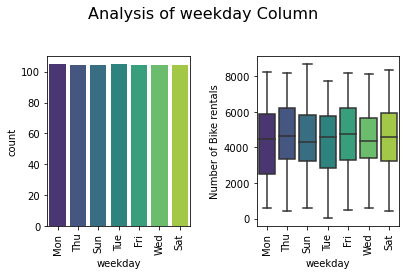

In [28]:
#Analysis of weekday  Column in a box plot
fig,ax = plt.subplots(figsize=(6,4),nrows=1,ncols=2)
fig.suptitle("Analysis of weekday Column",fontsize=16)
sns.boxplot(data=bike,x=bike["weekday"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='weekday', ylabel='Number of Bike rentals')
sns.countplot(data=bike,x=bike["weekday"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=5,
        hspace=8,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 2)
plt.show()

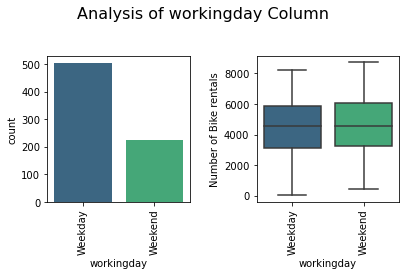

In [29]:
#Analysis of workingday  Column in a box plot
fig,ax = plt.subplots(figsize=(6,4),nrows=1,ncols=2)
fig.suptitle("Analysis of workingday Column",fontsize=16)
sns.boxplot(data=bike,x=bike["workingday"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='workingday', ylabel='Number of Bike rentals')
sns.countplot(data=bike,x=bike["workingday"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=5,
        hspace=8,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 2)
plt.show()

Observation:
   1. It is observed that Bike rentals numbers are high during all the weekday.

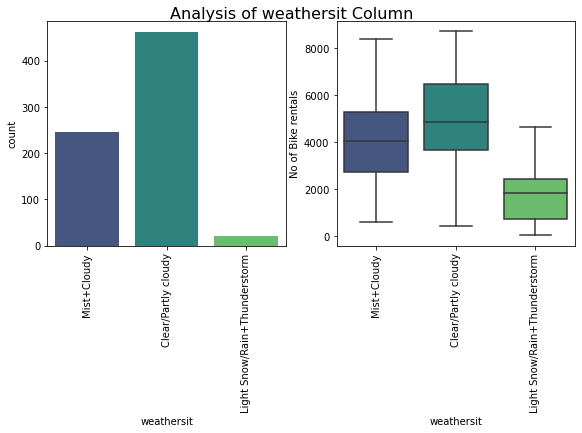

In [30]:
#Analysis of weathersit  Column in a box plot
fig,ax = plt.subplots(figsize=(8,6),nrows=1,ncols=2)
fig.suptitle("Analysis of weathersit Column",fontsize=16)
sns.boxplot(data=bike,x=bike["weathersit"],y = "cnt",palette ="viridis")
ax[1].set(xlabel='weathersit', ylabel='No of Bike rentals')
sns.countplot(data=bike,x=bike["weathersit"],palette ="viridis",ax=ax[0])
fig.subplots_adjust(left=None,
        bottom=None,
        right=None,
        top=None,
        wspace=6,
        hspace=6
                    ,)
for ax in fig.axes:
    ax.tick_params(axis= 'x',labelrotation=90)

    plt.tight_layout(pad = 0.4)
plt.show()

Obervation:

   1. It is observed that Bike rentals are at its higher when the weather situation is Clear/Partly cloudy.
   2. Bike rentals are at the lowest when  the weather situation is Light snow/Rain+Thunderstorm.
   

## Visualizing Numerical Columns

In [31]:
bike_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


### Univariate Analysis of numerical columns

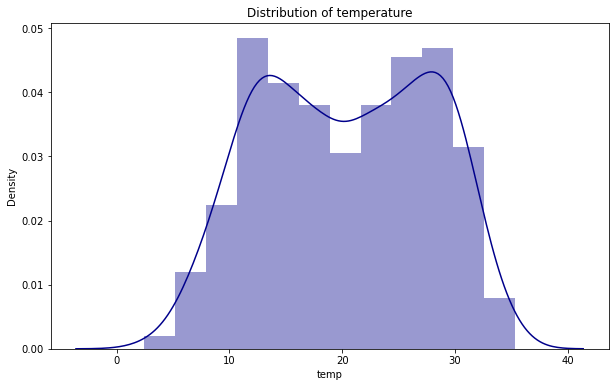

In [32]:
#Distribution of temperature
plt.figure(figsize=[10,6])
sns.distplot(bike.temp,color="darkblue")
plt.title("Distribution of temperature")
plt.show()

Observation:

   1. We can observe that Bike rental occurence increases between temperatures ~10 and ~30
   2. We cn also find a dip between ~15 and ~25

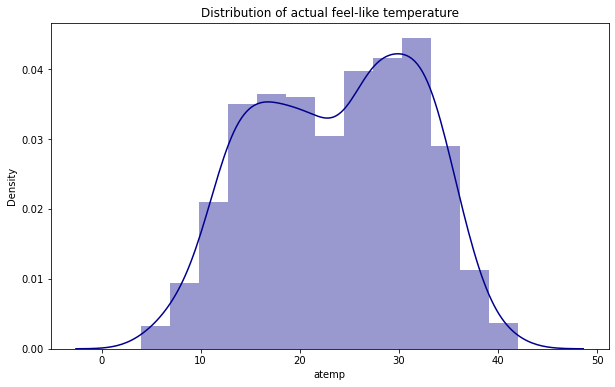

In [33]:
#Distribution of actual feel-like temperature
plt.figure(figsize=[10,6])
sns.distplot(bike.atemp,color="darkblue")
plt.title("Distribution of actual feel-like temperature")
plt.show()

Observation:

   1. The observation in actual feel-like temperature trend is similar to the previous temperature Value.

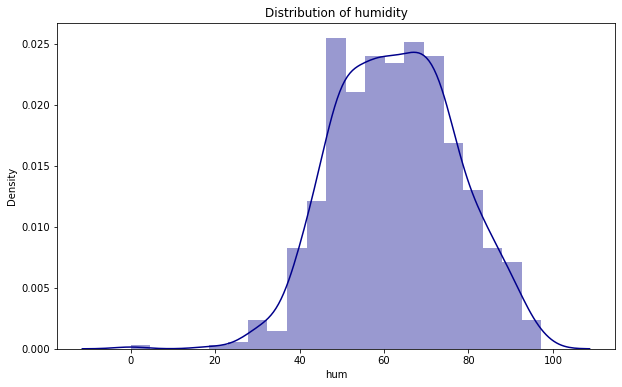

In [34]:
#Distribution of humidity
plt.figure(figsize=[10,6])
sns.distplot(bike.hum,color="darkblue")
plt.title("Distribution of humidity")
plt.show()

Observation:
    Demand in Bike rental is found between ~40 and ~80

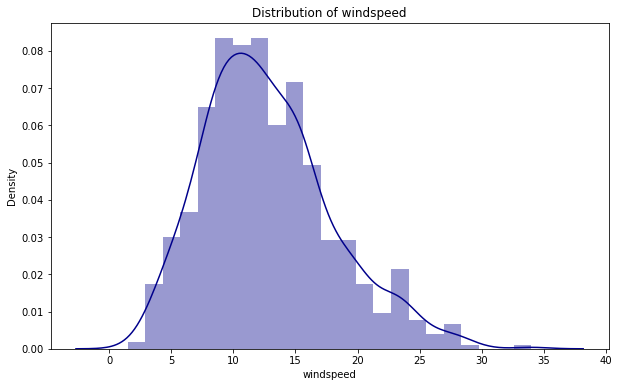

In [35]:
#Distribution of windspeed
plt.figure(figsize=[10,6])
sns.distplot(bike.windspeed,color="darkblue")
plt.title("Distribution of windspeed")
plt.show()

Observation:

   1. Bike rental demand is found when the windspeed ~5 and ~15

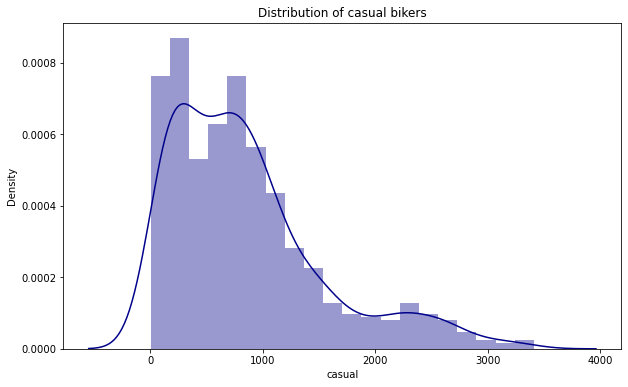

In [36]:
#Distribution of casual bikers
plt.figure(figsize=[10,6])
sns.distplot(bike.casual,color="darkblue")
plt.title("Distribution of casual bikers")
plt.show()

Observation:
   1. Casual Bike rentals are mostly around 1000 users.

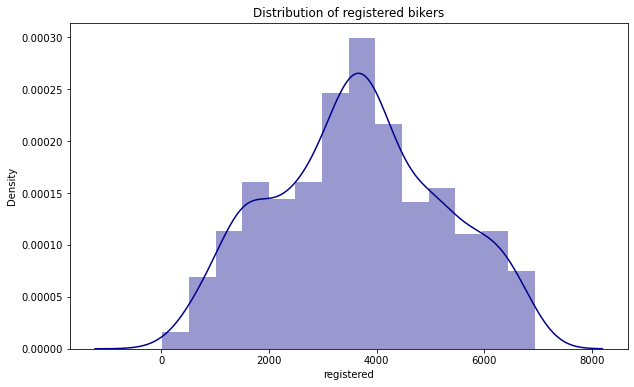

In [37]:
#Distribution of registered bikers
plt.figure(figsize=[10,6])
sns.distplot(bike.registered,color="darkblue")
plt.title("Distribution of registered bikers")
plt.show()

Observation:
1. Registered Bike rentals are mostly between 1500 to ~6000 users.

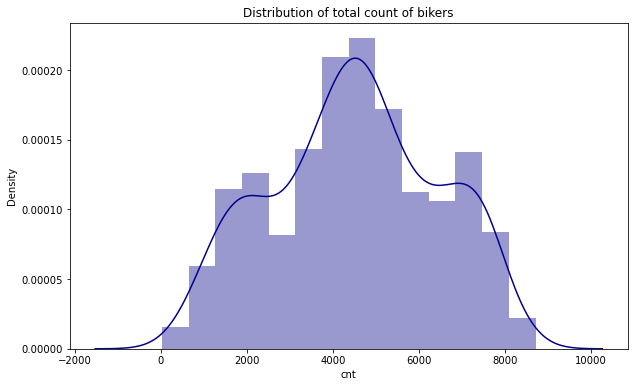

In [38]:
#Distribution of total count of bikers
plt.figure(figsize=[10,6])
sns.distplot(bike.cnt,color="darkblue")
plt.title("Distribution of total count of bikers")
plt.show()

Observation:
1. Most bike rentals are in the range between ~4000 to ~5000


### Bivariate and correlation of numerical Variables

<function matplotlib.pyplot.show(close=None, block=None)>

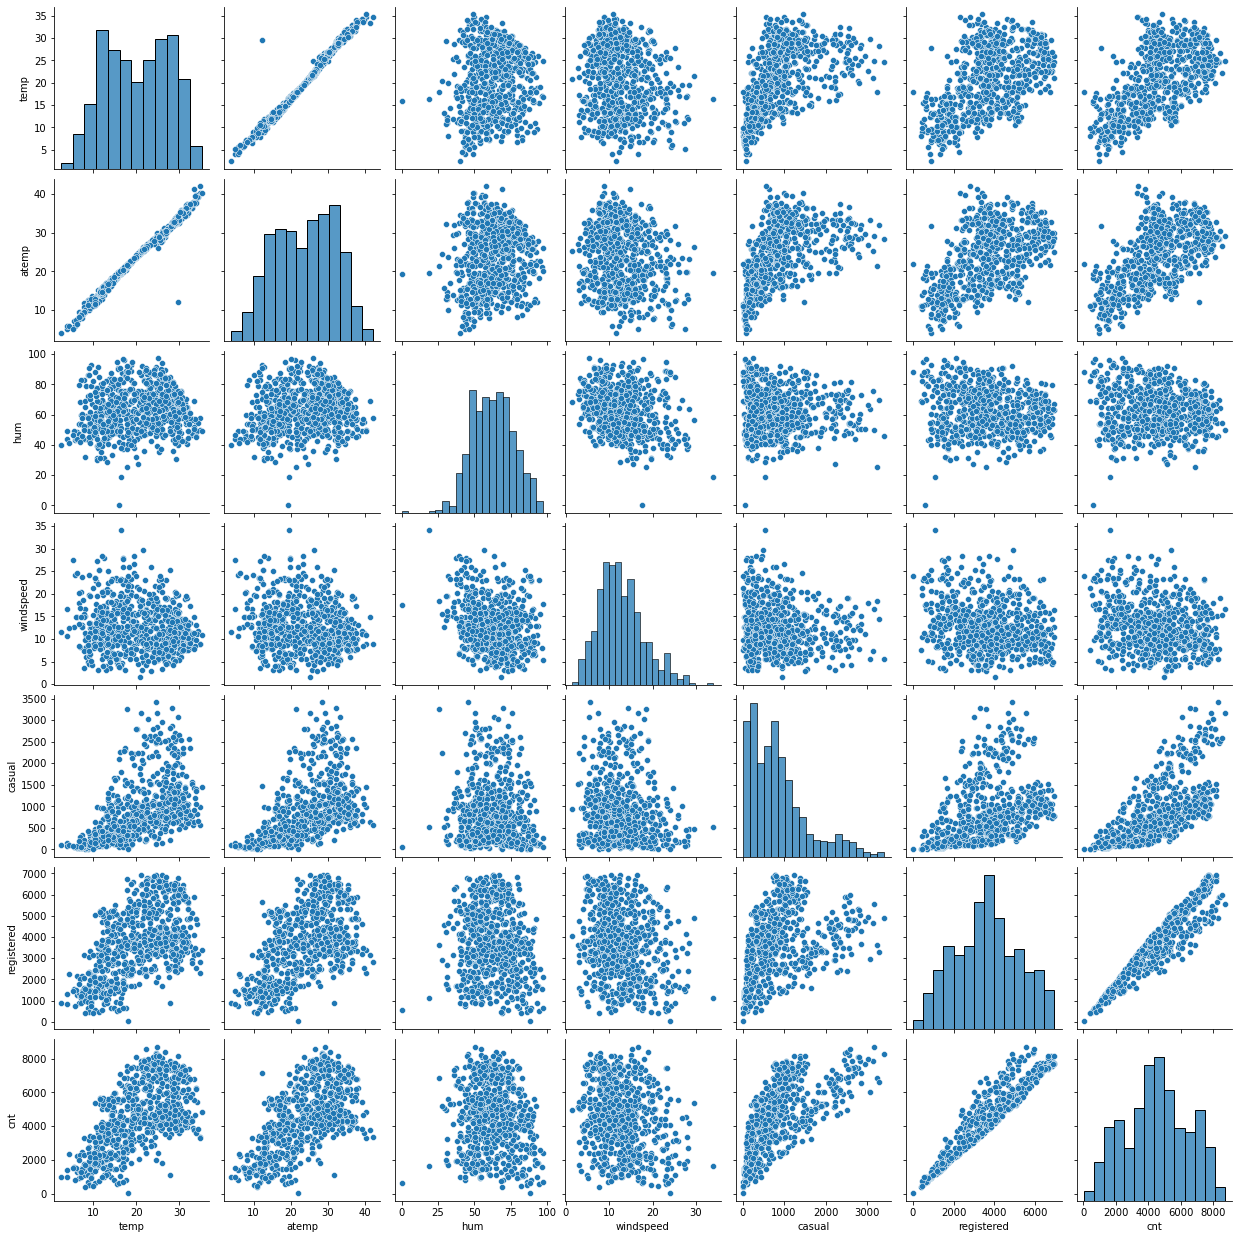

In [39]:
sns.pairplot(bike_numerical,palette="viridis")
plt.show

In [40]:
numcor = bike_numerical.corr()

<AxesSubplot:>

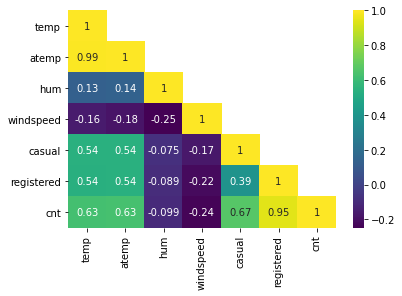

In [41]:
#Potting a Heatmap
mask = np.array(numcor)
mask[np.tril_indices_from(mask)]= False
sns.heatmap(data=numcor,mask=mask,annot =True,cmap="viridis")

Observation:

   1. There is a high correlation between temp and atemp - indicating multicollinearity.
   2. There is high correlation btween a Register and cnt - indicating multicollinearity.
   3. Casual and cnt can also indicate mulicollinearity.
   4. Windspeed and hum are negatively correlated to cnt which indicate if the windspeed/humidity increases there is a less demand in bike rentals.


### Treating Multicollinearity in numerical variables:

We can remove the columns with corr between -0.7 and 0.7
1. temp
2. casual (correlation is 0.67, it's ~0.7 )
3. registered

In [42]:
bike = bike.drop(["temp","casual","registered"],axis =1)

In [43]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,2018-01-01,spring,2018,Jan,Not a public holiday,Mon,Weekday,Mist+Cloudy,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,2018,Feb,Not a public holiday,Thu,Weekday,Mist+Cloudy,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,2018,Mar,Not a public holiday,Thu,Weekday,Clear/Partly cloudy,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,2018,Apr,Not a public holiday,Sun,Weekday,Clear/Partly cloudy,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,2018,May,Not a public holiday,Tue,Weekday,Clear/Partly cloudy,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,spring,2019,Dec,Not a public holiday,Fri,Weekday,Mist+Cloudy,11.33210,65.2917,23.458911,2114
727,2019-12-28,spring,2019,Dec,Not a public holiday,Sat,Weekend,Mist+Cloudy,12.75230,59.0000,10.416557,3095
728,2019-12-29,spring,2019,Dec,Not a public holiday,Sun,Weekend,Mist+Cloudy,12.12000,75.2917,8.333661,1341


## Data Preparation for Model building

### One Hot Encoding

In [44]:
bike_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
instant,,,,,,,
1,spring,2018,Jan,Not a public holiday,Mon,Weekday,Mist+Cloudy
2,spring,2018,Feb,Not a public holiday,Thu,Weekday,Mist+Cloudy
3,spring,2018,Mar,Not a public holiday,Thu,Weekday,Clear/Partly cloudy
4,spring,2018,Apr,Not a public holiday,Sun,Weekday,Clear/Partly cloudy
5,spring,2018,May,Not a public holiday,Tue,Weekday,Clear/Partly cloudy


In [45]:
bike_cat_dum=pd.get_dummies(bike_cat,drop_first=True)

In [46]:
bike_cat_dum.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Public holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend,weathersit_Light Snow/Rain+Thunderstorm,weathersit_Mist+Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
#Removing the Categorical columns in the bike Dataframe
bike = bike.drop(list(bike_cat.columns),axis=1)

In [48]:
#Concat the bike_cat_dum with Bike Dataframe
bike = pd.concat([bike_cat_dum,bike],axis=1)

In [49]:
bike.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Tue,weekday_Wed,workingday_Weekend,weathersit_Light Snow/Rain+Thunderstorm,weathersit_Mist+Cloudy,dteday,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2018-01-01,18.18125,80.5833,10.749882,985
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,2018-02-01,17.68695,69.6087,16.652113,801
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018-03-01,9.47025,43.7273,16.636703,1349
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2018-04-01,10.60610,59.0435,10.739832,1562
5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2018-05-01,11.46350,43.6957,12.522300,1600


### Creating X and y dataframes for further Regression model building

In [50]:
X = bike.drop(["cnt","dteday"],axis=1)

In [51]:
X.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend,weathersit_Light Snow/Rain+Thunderstorm,weathersit_Mist+Cloudy,atemp,hum,windspeed
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,18.18125,80.5833,10.749882
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,17.68695,69.6087,16.652113
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.47025,43.7273,16.636703
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,10.60610,59.0435,10.739832
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,11.46350,43.6957,12.522300


In [52]:
y = bike["cnt"]

In [53]:
type(y)

pandas.core.series.Series

In [54]:
y.head()

instant
1     985
2     801
3    1349
4    1562
5    1600
Name: cnt, dtype: int64

### (X,y)Train and test Split

In [55]:
# Import sklearn library for train_test_split
from sklearn.model_selection import train_test_split

In [56]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=20)

In [57]:
Xtrain.shape

(584, 28)

In [58]:
ytrain.shape

(584,)

In [59]:
Xtest.shape

(146, 28)

In [60]:
ytest.shape

(146,)

In [61]:
### List of features in X.
X_ft = list(X.columns)

In [62]:
len(X_ft)

28

### Scaling the numerical columns

#### Import and Instantiate an object of StandardScaler

In [63]:
#importing standard scaling (Converts to Normal Distribution)
from sklearn.preprocessing import StandardScaler

# Instantiate an object of StandardScaler
ss= StandardScaler()

#### Perform fit and transform on the Xtrain dataset

In [64]:
# Perform fit and transform on the Xtrain dataset
Xtrain[X_ft] = ss.fit_transform(Xtrain[X_ft])

In [65]:
Xtrain.head(2)

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend,weathersit_Light Snow/Rain+Thunderstorm,weathersit_Mist+Cloudy,atemp,hum,windspeed
instant,,,,,,,,,,,,,,,,,,,,,
389,1.797744,-0.590533,-0.577350,1.010327,-0.288943,-0.322443,-0.281926,3.419891,-0.319197,-0.295843,...,-0.407024,2.528321,-0.407024,-0.409878,-0.678233,-0.188311,-0.713473,-0.769690,1.421460,-0.876448
644,-0.556253,-0.590533,1.732051,1.010327,-0.288943,-0.322443,-0.281926,-0.292407,-0.319197,3.380167,...,-0.407024,-0.395519,-0.407024,-0.409878,1.474420,-0.188311,-0.713473,0.389147,0.230584,1.058402


In [66]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
season_spring,584.0,1.787003e-17,1.000857,-0.556253,-0.556253,-0.556253,-0.556253,1.797744
season_summer,584.0,1.330747e-17,1.000857,-0.590533,-0.590533,-0.590533,1.693384,1.693384
season_winter,584.0,-1.167255e-16,1.000857,-0.577350,-0.577350,-0.577350,0.000000,1.732051
yr_2019,584.0,3.456139e-16,1.000857,-0.989778,-0.989778,-0.989778,1.010327,1.010327
mnth_Aug,584.0,-2.121591e-16,1.000857,-0.288943,-0.288943,-0.288943,-0.288943,3.460893
mnth_Dec,584.0,6.083414e-18,1.000857,-0.322443,-0.322443,-0.322443,-0.322443,3.101319
mnth_Feb,584.0,-4.638603e-17,1.000857,-0.281926,-0.281926,-0.281926,-0.281926,3.547026
mnth_Jan,584.0,3.361086e-16,1.000857,-0.292407,-0.292407,-0.292407,-0.292407,3.419891
mnth_Jul,584.0,-8.744907e-17,1.000857,-0.319197,-0.319197,-0.319197,-0.319197,3.132860
mnth_Jun,584.0,-1.707158e-16,1.000857,-0.295843,-0.295843,-0.295843,-0.295843,3.380167


#### Perform Transform on the Xtest dataset

In [67]:
# Perform Transform on the Xtest dataset
Xtest[X_ft] = ss.transform(Xtest[X_ft])

In [68]:
Xtest.head(2)

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Weekend,weathersit_Light Snow/Rain+Thunderstorm,weathersit_Mist+Cloudy,atemp,hum,windspeed
instant,,,,,,,,,,,,,,,,,,,,,
284,-0.556253,-0.590533,1.732051,-0.989778,-0.288943,-0.322443,-0.281926,-0.292407,-0.319197,-0.295843,...,-0.407024,-0.395519,-0.407024,-0.409878,-0.678233,-0.188311,1.401594,0.435491,1.233581,-0.617923
454,-0.556253,1.693384,-0.577350,1.010327,-0.288943,-0.322443,-0.281926,-0.292407,-0.319197,-0.295843,...,-0.407024,-0.395519,-0.407024,-0.409878,1.474420,-0.188311,1.401594,-0.607482,-0.347517,-0.684650


In [69]:
Xtest.describe().T

,count,mean,std,min,25%,50%,75%,max
season_spring,146.0,1.209245e-01,1.069268,-0.556253,-0.556253,-0.556253,1.797744,1.797744
season_summer,146.0,-7.430554e-02,0.958553,-0.590533,-0.590533,-0.590533,-0.590533,1.693384
season_winter,146.0,-7.118017e-02,0.958664,-0.577350,-0.577350,-0.577350,-0.577350,1.732051
yr_2019,146.0,5.137257e-02,1.002648,-0.989778,-0.989778,1.010327,1.010327,1.010327
mnth_Aug,146.0,1.476819e-01,1.206899,-0.288943,-0.288943,-0.288943,-0.288943,3.460893
mnth_Dec,146.0,-1.582904e-01,0.734006,-0.322443,-0.322443,-0.322443,-0.322443,3.101319
mnth_Feb,146.0,5.900783e-02,1.094251,-0.281926,-0.281926,-0.281926,-0.281926,3.547026
mnth_Jan,146.0,1.144201e-01,1.163628,-0.292407,-0.292407,-0.292407,-0.292407,3.419891
mnth_Jul,146.0,-1.300433e-01,0.788319,-0.319197,-0.319197,-0.319197,-0.319197,3.132860
mnth_Jun,146.0,3.147269e-02,1.050543,-0.295843,-0.295843,-0.295843,-0.295843,3.380167


## Building linear models

### Adding a constant for fitting a line using Statsmodels

In [70]:
#importing statsmodels
import statsmodels.api as sm

In [71]:
#Adding a constant for fitting a line using Statsmodels
Xtrain_sm = sm.add_constant(Xtrain)

In [72]:
# Create a first fitted model
lr= sm.OLS(ytrain,Xtrain_sm).fit()

In [73]:
lr.params

const                                      4495.125000
season_spring                              -421.462817
season_summer                                53.226617
season_winter                               213.145273
yr_2019                                    1005.176863
mnth_Aug                                    -29.418424
mnth_Dec                                    -62.120629
mnth_Feb                                    -11.106674
mnth_Jan                                    -33.340466
mnth_Jul                                    -92.979139
mnth_Jun                                     15.417433
mnth_Mar                                     26.349376
mnth_May                                     30.592556
mnth_Nov                                    -71.706129
mnth_Oct                                     35.641459
mnth_Sep                                    141.783654
holiday_Public holiday                     -110.967071
weekday_Mon                                 -48.126264
weekday_Sa

In [74]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     97.30
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          9.48e-194
Time:                        21:10:58   Log-Likelihood:                -4730.8
No. Observations:                 584   AIC:                             9520.
Df Residuals:                     555   BIC:                             9646.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Applying RFE to reduce the features.

In [75]:
#Importing RFE from sklearn,feature_selection
from sklearn.feature_selection import RFE

In [76]:
len(Xtrain.columns)

28

In [77]:
# Out of 28 features, we will choose 15 features to start with initially

In [78]:
# From sklearn library import LinearRegression
from sklearn.linear_model import LinearRegression

# initiating Linear Regression
lm = LinearRegression()

In [79]:
lm.fit(Xtrain,ytrain)

LinearRegression()

In [80]:
# RFE
rfe = RFE(lm,15)
# Running RFE
rfe = rfe.fit(Xtrain,ytrain)

In [81]:
# Checking list of selections and ranking of each variable by RFE
list(zip(Xtrain.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('holiday_Public holiday', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 5),
 ('workingday_Weekend', True, 1),
 ('weathersit_Light Snow/Rain+Thunderstorm', True, 1),
 ('weathersit_Mist+Cloudy', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [82]:
#List of 15 selected feature
sel_col = Xtrain.columns[rfe.support_]
len(sel_col)

15

In [83]:
#List of dropped features
del_col = Xtrain.columns[~rfe.support_]
del_col

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [84]:
# Creating a dataframe "Xtrain_rfe" with variables selected by RFE
Xtrain_rfe = Xtrain[sel_col]

In [85]:
Xtrain_rfe

,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Jul,mnth_Nov,mnth_Sep,holiday_Public holiday,workingday_Weekend,weathersit_Light Snow/Rain+Thunderstorm,weathersit_Mist+Cloudy,atemp,hum,windspeed
instant,,,,,,,,,,,,,,,
389,1.797744,-0.590533,-0.577350,1.010327,-0.322443,-0.319197,-0.295843,-0.299253,-0.167836,-0.678233,-0.188311,-0.713473,-0.769690,1.421460,-0.876448
644,-0.556253,-0.590533,1.732051,1.010327,-0.322443,-0.319197,-0.295843,-0.299253,-0.167836,1.474420,-0.188311,-0.713473,0.389147,0.230584,1.058402
448,-0.556253,1.693384,-0.577350,1.010327,-0.322443,-0.319197,-0.295843,-0.299253,-0.167836,1.474420,-0.188311,1.401594,0.072306,1.765432,0.049224
592,-0.556253,-0.590533,-0.577350,1.010327,-0.322443,-0.319197,-0.295843,-0.299253,-0.167836,-0.678233,-0.188311,-0.713473,1.095878,-0.078702,-0.259423
435,1.797744,-0.590533,-0.577350,1.010327,-0.322443,-0.319197,3.380167,-0.299253,-0.167836,-0.678233,-0.188311,-0.713473,-0.705071,-1.068122,0.448968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,-0.556253,-0.590533,-0.577350,-0.989778,-0.322443,3.132860,-0.295843,-0.299253,-0.167836,-0.678233,-0.188311,-0.713473,1.470639,0.846258,0.165966
224,-0.556253,-0.590533,-0.577350,-0.989778,3.101319,-0.319197,-0.295843,-0.299253,-0.167836,1.474420,-0.188311,-0.713473,1.095909,-1.497928,-0.851581
272,-0.556253,-0.590533,1.732051,-0.989778,-0.322443,-0.319197,-0.295843,3.341656,-0.167836,1.474420,-0.188311,-0.713473,0.609341,0.473385,-0.217683


In [86]:
Xtrain_rfe.shape

(584, 15)

In [87]:
# Importing required statsmodels library
import statsmodels.api as sm
# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [89]:
Xtrain_new = build_model(Xtrain_rfe,ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     182.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          9.76e-206
Time:                        21:10:58   Log-Likelihood:                -4735.3
No. Observations:                 584   AIC:                             9503.
Df Residuals:                     568   BIC:                             9573.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Dropping season_summer Feature with P-Value - 0.107

In [90]:
Xtrain_rfe = Xtrain_rfe.drop('season_summer', 1)

In [91]:
Xtrain_new = build_model(Xtrain_rfe,ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     194.7
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          2.50e-206
Time:                        21:10:58   Log-Likelihood:                -4736.7
No. Observations:                 584   AIC:                             9503.
Df Residuals:                     569   BIC:                             9569.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Dropping mnth_Dec Feature with P-Value - 0.050 

In [92]:
Xtrain_rfe = Xtrain_rfe.drop('mnth_Dec', 1)

In [93]:
Xtrain_new = build_model(Xtrain_rfe,ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     208.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.14e-206
Time:                        21:10:58   Log-Likelihood:                -4738.6
No. Observations:                 584   AIC:                             9505.
Df Residuals:                     570   BIC:                             9566.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Dropping mnth_Nov Feature with P-Value - 0.063

In [94]:

Xtrain_rfe= Xtrain_rfe.drop('mnth_Nov', 1)

In [95]:
Xtrain_new = build_model(Xtrain_rfe,ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          4.15e-207
Time:                        21:10:58   Log-Likelihood:                -4740.4
No. Observations:                 584   AIC:                             9507.
Df Residuals:                     571   BIC:                             9564.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Drop the columns which have high VIF (VIF > 10)

In [96]:
checkVIF(Xtrain_new)

,Features,VIF
10,atemp,2.76
1,season_spring,2.61
11,hum,1.90
2,season_winter,1.76
9,weathersit_Mist+Cloudy,1.61
8,weathersit_Light Snow/Rain+Thunderstorm,1.34
12,windspeed,1.18
4,mnth_Jul,1.12
7,workingday_Weekend,1.10
6,holiday_Public holiday,1.09


All the columns have VIF < 5. So, we will not drop any of the features

### Fitting the Linar Model

In [97]:
# 1. Add a constant
Xtrain_lm = sm.add_constant(Xtrain_rfe)
# 2. Create model
lr = sm.OLS(ytrain,Xtrain_lm)
# 3. Fit the model
lm = lr.fit()
# 4. View the parameters
lm.params

const                                      4495.125000
season_spring                              -482.432505
season_winter                               154.523540
yr_2019                                    1002.046525
mnth_Jul                                   -101.318695
mnth_Sep                                    139.940836
holiday_Public holiday                     -119.694663
workingday_Weekend                           93.573730
weathersit_Light Snow/Rain+Thunderstorm    -323.354197
weathersit_Mist+Cloudy                     -224.593536
atemp                                       860.009310
hum                                        -196.171925
windspeed                                  -194.867329
dtype: float64

In [98]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          4.15e-207
Time:                        21:10:58   Log-Likelihood:                -4740.4
No. Observations:                 584   AIC:                             9507.
Df Residuals:                     571   BIC:                             9564.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    4495.1250     33.935    132.461      0.000    4428.471    4561.779
season_spring                            -482.4325     54.801     -8.803      0.000    -590.068    -374.797
season_winter                             154.5235     44.959      3.437      0.001      66.218     242.829
yr_2019                                  1002.0465     34.554     29.000      0.000     934.178    1069.915
mnth_Jul                                 -101.3187     35.871     -2.825      0.005    -171.773     -30.864
mnth_Sep                                  139.9408     34.749      4.027      0.000      71.689     208.193
holiday_Public holiday                   -119.6947     35.353     -3.386      0.001    -189.132     -50.258
workingday_Weekend                         93.5737     35.512      2.635      0.009      23.825     163.323
weathersit_Light Snow/Rain+Thunderstorm  -323.3542     39.315     -8.225      0.000    -400.574    -246.134
weathersit_Mist+Cloudy                   -224.5935     43.071     -5.215      0.000    -309.190    -139.997
atemp                                     860.0093     56.366     15.258      0.000     749.299     970.719
hum                                      -196.1719     46.796     -4.192      0.000    -288.086    -104.258
windspeed                                -194.8673     36.876     -5.284      0.000    -267.296    -122.439
==============================================================================
Omnibus:                      106.482   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.904
Skew:                          -0.986   Prob(JB):                     7.24e-51
Kurtosis:                       5.367   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual analysis of Train data 

In [99]:
ytrain_pred = lm.predict(Xtrain_lm)

In [100]:
Xtrain_lm.shape

(584, 13)

In [101]:
ytrain_pred.shape

(584,)

In [102]:
ytrain_pred.head()

instant
389    3949.235669
644    6496.356313
448    5287.544382
592    6863.337779
435    4234.914276
dtype: float64

In [103]:
type(ytrain_pred)

pandas.core.series.Series

In [104]:
res = ytrain - ytrain_pred

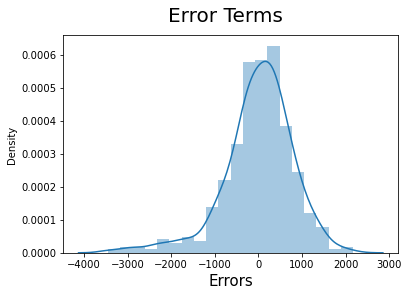

In [105]:
fig = plt.figure()
fig.suptitle('Error Terms',fontsize=20)
sns.distplot(res,bins=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

## Making Predictions Using the Final Model

In [106]:
print(Xtest.shape)
print(Xtrain_rfe.shape)

(146, 28)
(584, 12)


In [107]:
#Removing the extra features in the test data
sel_feat = Xtrain_rfe.columns

In [108]:
Xtest_new = Xtest[sel_feat]

In [109]:
Xtest_new.shape

(146, 12)

In [110]:
# Add a constant to Xtest_new
Xtest_new = sm.add_constant(Xtest_new)


In [111]:
# Making Predictions based on test data
ytest_pred = lm.predict(Xtest_new)

In [112]:
ytest_pred.head(10)

instant
284    3985.452959
454    5260.430095
267    4687.183416
270    4605.215612
121    3272.927721
436    4782.920101
293    3748.182445
441    4639.128101
176    4884.110346
509    6473.983715
dtype: float64

## Model Evaluation

In [113]:
# From sklearn library import r2_score (To get r-squared value)
from sklearn.metrics import r2_score

In [114]:
# Evaluating the model on the train
r2train = r2_score(y_true=ytrain,y_pred=ytrain_pred)
print("R2 of the train set ",r2train)

R2 of the train set  0.8251058621960077


In [115]:
#Calculating Adj r2 for train data
# Formula: (1-R2)*(n-1)/(n-p-1)
# n -> Sample size = 146
# p -> number of predictor variables = 12
adjr2train = 1-((1 - r2train)*(146 - 1))/(146 - 12 -1)
print("Adjusted R2 of the train set",adjr2train)

Adjusted R2 of the train set 0.8093259399881287


In [116]:
# Evaluating the model on the test
r2test = r2_score(y_true=ytest,y_pred=ytest_pred)
print("R2 of the test set ",r2test)

R2 of the test set  0.837695091026085


In [117]:
#Calculating Adj r2 for test data
# Formula: (1-R2)*(n-1)/(n-p-1)
# n -> Sample size = 146
# p -> number of predictor variables = 1
adjr2test = 1-((1 - r2test)*(146 - 1))/(146 - 12 -1)
print("Adjusted R2 of the test set ",adjr2test)

Adjusted R2 of the test set  0.8230510390885889


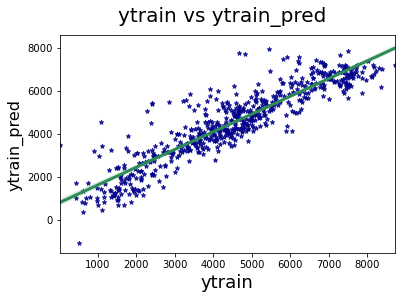

In [118]:
# Plotting graph b/w actual and predicted values with train data

fig = plt.figure()
fig.suptitle('ytrain vs ytrain_pred', fontsize = 20) 
sns.regplot(x=ytrain,y=ytrain_pred, scatter_kws = {"color": 'darkblue',"s": 20}, line_kws = {"color": 'seagreen', "lw": 3}, marker='*')             
plt.xlabel('ytrain', fontsize = 18)                          
plt.ylabel('ytrain_pred', fontsize = 16)
plt.show()

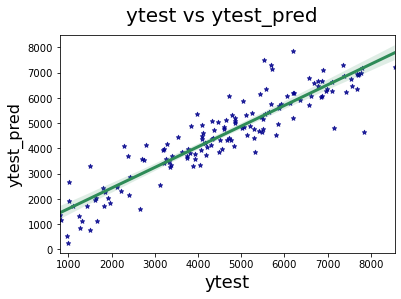

In [119]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
fig.suptitle('ytest vs ytest_pred', fontsize = 20) 
sns.regplot(x=ytest,y=ytest_pred, scatter_kws = {"color": 'darkblue',"s": 20}, line_kws = {"color": 'seagreen', "lw": 3}, marker='*')             
plt.xlabel('ytest', fontsize = 18)                          
plt.ylabel('ytest_pred', fontsize = 16)
plt.show()

### Calculate Root Mean Square Error and Root Mean Squared Logarithmic Error

In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [121]:
#finding root mean square
rmse = mean_squared_error(ytest, ytest_pred,squared=False)
print(rmse)

772.0375525285135


In [122]:
#Finding root mean squared log error
rmsle = np.sqrt(mean_squared_log_error(ytest,ytest_pred ))
rmsle

0.2516960789702851

## Model Summary

### Significant features in predicting the demand for shared bikes along with their coefficients

In [123]:
lm.params

const                                      4495.125000
season_spring                              -482.432505
season_winter                               154.523540
yr_2019                                    1002.046525
mnth_Jul                                   -101.318695
mnth_Sep                                    139.940836
holiday_Public holiday                     -119.694663
workingday_Weekend                           93.573730
weathersit_Light Snow/Rain+Thunderstorm    -323.354197
weathersit_Mist+Cloudy                     -224.593536
atemp                                       860.009310
hum                                        -196.171925
windspeed                                  -194.867329
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 4495.125000 + (-482.432505)X season_spring + (154.523540 X season_winter)+(1002.046525 X yr_2019 )+(-101.318695 X mnth_Jul)+(139.940836 X mnth_Sep)+(-119.694663 X holiday_Public holiday)+(93.573730 X workingday_Weekend)+(-323.354197 X weathersit_Light Snow/Rain+Thunderstorm)+(-224.593536 X weathersit_Mist+Cloudy)+(860.009310 X atemp)+(-196.171925 X hum)+(-194.867329 X windspeed)

Other Observation:    

1. R2 of the train set 82.5% and test set 83.7%
2. Adjusted R2 of the train set 80.9% and test set 82.3%

The model has generalized well on the test set and is our best fit model